In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
graf = pd.read_csv("311_Service_Requests_-_Graffiti_Removal.csv")
alley = pd.read_csv("311_Service_Requests_-_Alley_Lights_Out.csv")
vacant = pd.read_csv("311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv")

/home/bac2qh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# lowercase them all
graf.columns = [x.lower() for x in graf.columns]
vacant.columns = [x.lower() for x in vacant.columns]
alley.columns = [x.lower() for x in alley.columns]

In [4]:
# columns in the Graffiti Removal 
graf.columns

Index(['creation date', 'status', 'completion date', 'service request number',
       'type of service request', 'what type of surface is the graffiti on?',
       'where is the graffiti located?', 'street address', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [5]:
# columns in the Vacant and Abandoned Buildings Reported 
list(vacant.keys())

['service request type',
 'service request number',
 'date service request was received',
 'location of building on the lot (if garage, change type code to bgd).',
 'is the building dangerous or hazardous?',
 'is building open or boarded?',
 'if the building is open, where is the entry point?',
 'is the building currently vacant or occupied?',
 'is the building vacant due to fire?',
 'any people using property? (homeless, childen, gangs)',
 'address street number',
 'address street direction',
 'address street name',
 'address street suffix',
 'zip code',
 'x coordinate',
 'y coordinate',
 'ward',
 'police district',
 'community area',
 'latitude',
 'longitude',
 'location']

In [6]:
# columns in the Alley Lights Out
list(alley.keys())

['creation date',
 'status',
 'completion date',
 'service request number',
 'type of service request',
 'street address',
 'zip code',
 'x coordinate',
 'y coordinate',
 'ward',
 'police district',
 'community area',
 'latitude',
 'longitude',
 'location']

In [7]:
# rename some of the columns
graf = graf.rename(columns = {"what type of surface is the graffiti on?":"subtype"})
vacant = vacant.rename(columns = {"service request type":"type of service request", "data service request was received":"creation date", 
                                 "location of building on the lot (if garage, change type code to bgd).":"subtype"})


In [8]:
vacant.columns

Index(['type of service request', 'service request number',
       'date service request was received', 'subtype',
       'is the building dangerous or hazardous?',
       'is building open or boarded?',
       'if the building is open, where is the entry point?',
       'is the building currently vacant or occupied?',
       'is the building vacant due to fire?',
       'any people using property? (homeless, childen, gangs)',
       'address street number', 'address street direction',
       'address street name', 'address street suffix', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [9]:
# combine them all
df = pd.concat([graf, alley, vacant], axis = 0)
df

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,date service request was received,"if the building is open, where is the entry point?",...,ssa,status,street address,subtype,type of service request,ward,where is the graffiti located?,x coordinate,y coordinate,zip code
0,NaN,NaN,NaN,NaN,NaN,59.0,01/03/2011,01/01/2011,NaN,NaN,...,NaN,Completed - Dup,3701 S WOLCOTT AVE,Brick - Unpainted,Graffiti Removal,11.0,Front,1.164295e+06,1.880150e+06,60609.0
1,NaN,NaN,NaN,NaN,NaN,20.0,01/03/2011,01/01/2011,NaN,NaN,...,NaN,Completed - Dup,1802 N TRIPP AVE,Aluminum Siding,Graffiti Removal,30.0,Garage,1.147772e+06,1.911661e+06,60639.0
2,NaN,NaN,NaN,NaN,NaN,3.0,01/03/2011,01/01/2011,NaN,NaN,...,34.0,Completed - Dup,4150 N KENMORE AVE,Other / Unknown Surface,Graffiti Removal,46.0,Front,1.168431e+06,1.927515e+06,60613.0
3,NaN,NaN,NaN,NaN,NaN,5.0,01/03/2011,01/01/2011,NaN,NaN,...,NaN,Completed - Dup,3035 N HOYNE AVE,"Cement (Sidewalk, Alley, Wall, Curb)",Graffiti Removal,32.0,Front,1.161822e+06,1.920144e+06,60618.0
4,NaN,NaN,NaN,NaN,NaN,15.0,01/04/2011,01/01/2011,NaN,NaN,...,NaN,Completed - Dup,4500 N CENTRAL AVE,Metal,Graffiti Removal,38.0,Front,1.138196e+06,1.929380e+06,60630.0
5,NaN,NaN,NaN,NaN,NaN,5.0,01/05/2011,01/01/2011,NaN,NaN,...,NaN,Completed - Dup,2221 W BELMONT AVE,Brick - Unpainted,Graffiti Removal,32.0,Front,1.160992e+06,1.921216e+06,60618.0
6,NaN,NaN,NaN,NaN,NaN,1.0,01/12/2011,01/01/2011,NaN,NaN,...,NaN,Completed - Dup,6969 N WOLCOTT AVE,Brick - Unpainted,Graffiti Removal,49.0,Front,1.162345e+06,1.946287e+06,60626.0
7,NaN,NaN,NaN,NaN,NaN,31.0,01/03/2011,01/01/2011,NaN,NaN,...,NaN,Completed,1900 W CULLERTON ST,Wood - Painted,Graffiti Removal,25.0,Garage,1.164016e+06,1.890428e+06,60608.0
8,NaN,NaN,NaN,NaN,NaN,61.0,01/03/2011,01/01/2011,NaN,NaN,...,NaN,Completed,444 W 44TH PL,Vinyl Siding,Graffiti Removal,11.0,Side,1.173856e+06,1.875426e+06,60609.0
9,NaN,NaN,NaN,NaN,NaN,57.0,01/03/2011,01/01/2011,NaN,NaN,...,NaN,Completed,4759 S KENNETH AVE,Brick - Unpainted,Graffiti Removal,23.0,Garage,1.147495e+06,1.872700e+06,60632.0


In [10]:
df.columns

Index(['address street direction', 'address street name',
       'address street number', 'address street suffix',
       'any people using property? (homeless, childen, gangs)',
       'community area', 'completion date', 'creation date',
       'date service request was received',
       'if the building is open, where is the entry point?',
       'is building open or boarded?',
       'is the building currently vacant or occupied?',
       'is the building dangerous or hazardous?',
       'is the building vacant due to fire?', 'latitude', 'location',
       'longitude', 'police district', 'service request number', 'ssa',
       'status', 'street address', 'subtype', 'type of service request',
       'ward', 'where is the graffiti located?', 'x coordinate',
       'y coordinate', 'zip code'],
      dtype='object')

In [11]:
# time format
df['creation date'] = pd.to_datetime(df["creation date"], format = "%m/%d/%Y")
df['completion date'] = pd.to_datetime(df["completion date"], format = "%m/%d/%Y")

In [12]:
# add response time into the columns 
df["response time"] = df["completion date"] - df["creation date"]

In [13]:
ratio = df["type of service request"].value_counts(normalize = True)
ratio

Graffiti Removal             0.788186
Alley Light Out              0.161517
Vacant/Abandoned Building    0.050296
Name: type of service request, dtype: float64

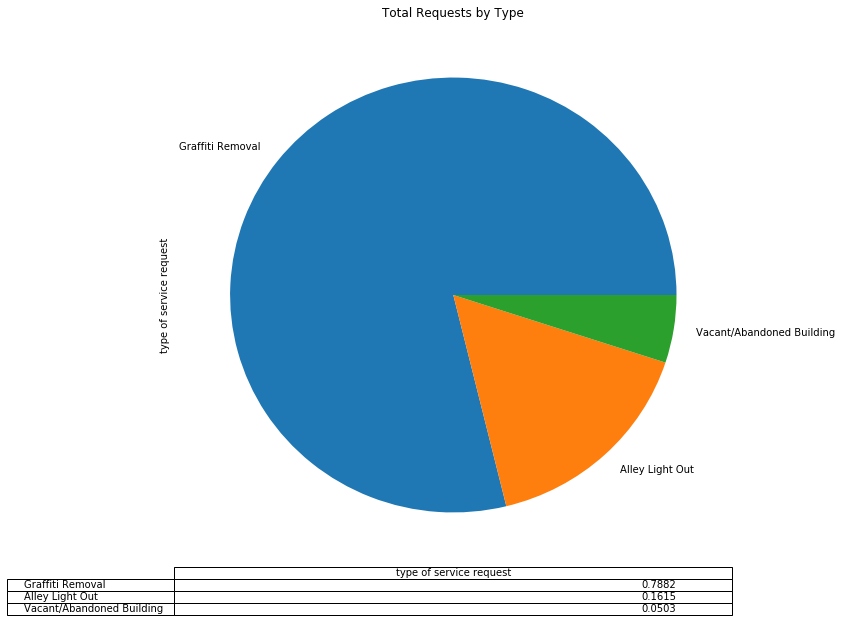

In [14]:
# create a pie chart 
ratio.plot.pie(title = "Total Requests by Type", table = np.round(ratio, 4), figsize = (10, 10))
plt.show()

In [15]:
df_g = df[df['type of service request'] == "Graffiti Removal"]
df_a = df[df['type of service request'] == "Alley Light Out"]
df_v = df[df['type of service request'] == "Vacant/Abandoned Building"]

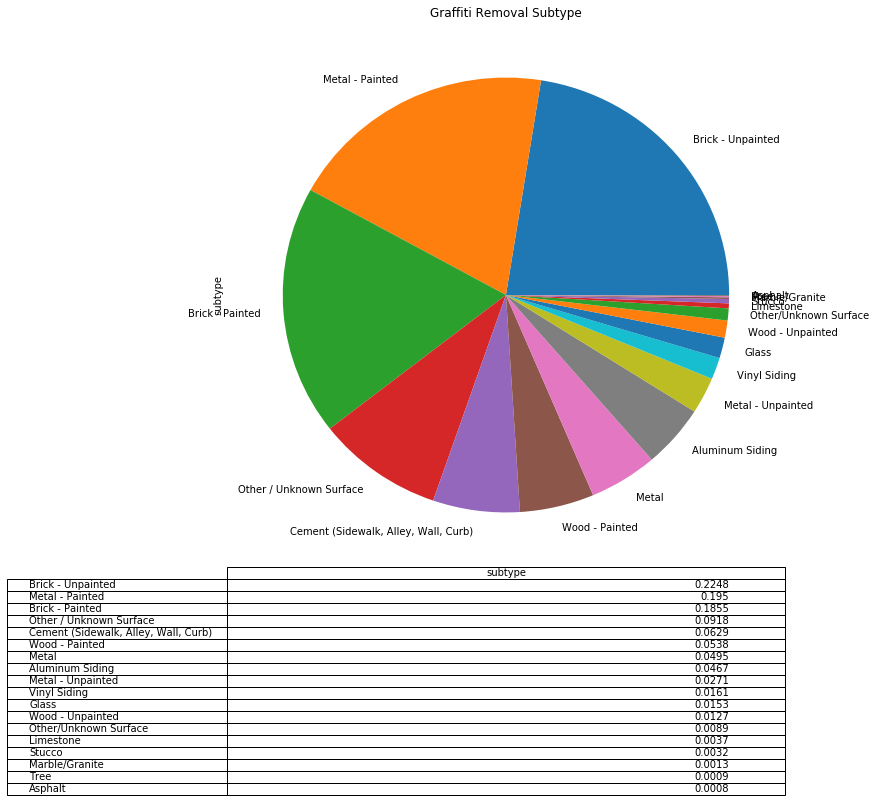

In [16]:
# subtype for graffiti removal
g_subtype_ratio = df_g["subtype"].value_counts(normalize = True)
# create a pie chart 
g_subtype_ratio.plot.pie(title = "Graffiti Removal Subtype", table = np.round(g_subtype_ratio, 4), figsize = (10, 10))
plt.show()

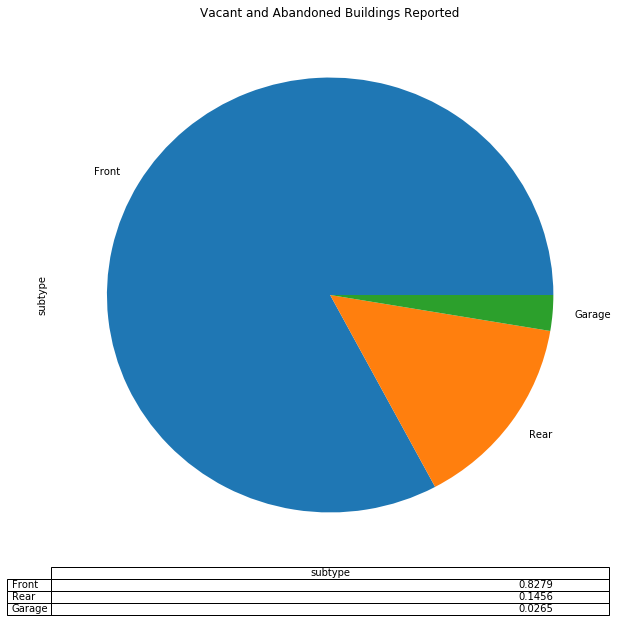

In [17]:
# subtype for vacant and abandoned buildings 
v_subtype_ratio = df_v["subtype"].value_counts(normalize = True)
# create a pie chart 
v_subtype_ratio.plot.pie(title = "Vacant and Abandoned Buildings Reported", table = np.round(v_subtype_ratio, 4), figsize = (10, 10))
plt.show()

In [18]:
# There is no subtype for Alley Lights Out 

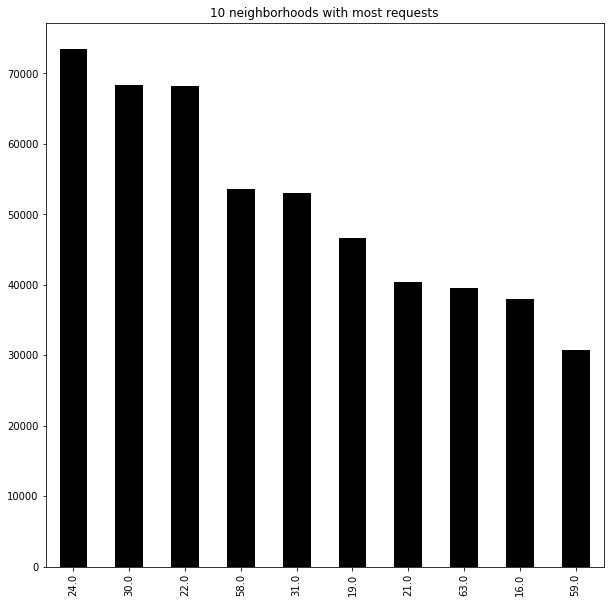

In [19]:
# by neighborhood (community area)
df['community area'].value_counts().nlargest(10).plot.bar(title = "10 neighborhoods with most requests", color = "black", figsize=(10, 10))

In [20]:
df.head()

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,date service request was received,"if the building is open, where is the entry point?",...,status,street address,subtype,type of service request,ward,where is the graffiti located?,x coordinate,y coordinate,zip code,response time
0,NaN,NaN,NaN,NaN,NaN,59.0,2011-01-03,2011-01-01,NaN,NaN,...,Completed - Dup,3701 S WOLCOTT AVE,Brick - Unpainted,Graffiti Removal,11.0,Front,1.164295e+06,1.880150e+06,60609.0,2 days
1,NaN,NaN,NaN,NaN,NaN,20.0,2011-01-03,2011-01-01,NaN,NaN,...,Completed - Dup,1802 N TRIPP AVE,Aluminum Siding,Graffiti Removal,30.0,Garage,1.147772e+06,1.911661e+06,60639.0,2 days
2,NaN,NaN,NaN,NaN,NaN,3.0,2011-01-03,2011-01-01,NaN,NaN,...,Completed - Dup,4150 N KENMORE AVE,Other / Unknown Surface,Graffiti Removal,46.0,Front,1.168431e+06,1.927515e+06,60613.0,2 days
3,NaN,NaN,NaN,NaN,NaN,5.0,2011-01-03,2011-01-01,NaN,NaN,...,Completed - Dup,3035 N HOYNE AVE,"Cement (Sidewalk, Alley, Wall, Curb)",Graffiti Removal,32.0,Front,1.161822e+06,1.920144e+06,60618.0,2 days
4,NaN,NaN,NaN,NaN,NaN,15.0,2011-01-04,2011-01-01,NaN,NaN,...,Completed - Dup,4500 N CENTRAL AVE,Metal,Graffiti Removal,38.0,Front,1.138196e+06,1.929380e+06,60630.0,3 days


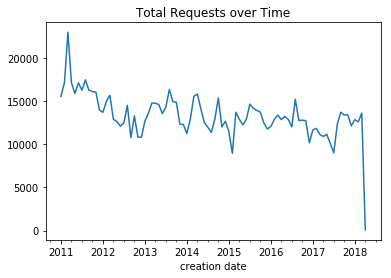

In [21]:
# requests by time
df[df["creation date"] > "2011-01-01"].groupby(pd.Grouper(key='creation date', freq='m')).size().plot(title = "Total Requests over Time")

In [22]:
# response time
df.groupby('type of service request')['response time'].describe()

,count,mean,std,min,25%,50%,75%,max
type of service request,,,,,,,,
Alley Light Out,190870,47 days 22:49:38.907109,141 days 21:39:17.414488,0 days 00:00:00,2 days 00:00:00,13 days 00:00:00,45 days 00:00:00,6107 days 00:00:00
Graffiti Removal,973239,7 days 22:55:04.521088,341 days 10:53:43.891610,0 days 00:00:00,0 days 00:00:00,1 days 00:00:00,3 days 00:00:00,32401 days 00:00:00
Vacant/Abandoned Building,0,NaT,NaT,NaN,NaT,NaT,NaT,NaT


In [23]:
df.sort_values(by = "creation date", ascending = False)

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,date service request was received,"if the building is open, where is the entry point?",...,status,street address,subtype,type of service request,ward,where is the graffiti located?,x coordinate,y coordinate,zip code,response time
973243,NaN,NaN,NaN,NaN,NaN,31.0,NaT,2018-04-01,NaN,NaN,...,Open - Dup,2605 S WESTERN AVE,Brick - Painted,Graffiti Removal,25.0,Viaduct,1.160786e+06,1.886611e+06,60608.0,NaT
973280,NaN,NaN,NaN,NaN,NaN,57.0,NaT,2018-04-01,NaN,NaN,...,Open,4639 S HARDING AVE,Metal - Painted,Graffiti Removal,14.0,Garage,1.150805e+06,1.873581e+06,60632.0,NaT
195334,NaN,NaN,NaN,NaN,NaN,27.0,NaT,2018-04-01,NaN,NaN,...,Open - Dup,2925 W WARREN BLVD,NaN,Alley Light Out,27.0,NaN,1.156882e+06,1.900214e+06,60612.0,NaT
973242,NaN,NaN,NaN,NaN,NaN,59.0,NaT,2018-04-01,NaN,NaN,...,Open - Dup,1706 W 37TH ST,Aluminum Siding,Graffiti Removal,12.0,Front,1.165559e+06,1.880185e+06,60609.0,NaT
973298,NaN,NaN,NaN,NaN,NaN,7.0,NaT,2018-04-01,NaN,NaN,...,Open,2248 N LAKEWOOD AVE,"Cement (Sidewalk, Alley, Wall, Curb)",Graffiti Removal,2.0,Rear,1.167276e+06,1.915073e+06,60614.0,NaT
973297,NaN,NaN,NaN,NaN,NaN,22.0,NaT,2018-04-01,NaN,NaN,...,Open,2535 W FULLERTON AVE,Brick - Unpainted,Graffiti Removal,1.0,Side,1.158952e+06,1.915865e+06,60647.0,NaT
973296,NaN,NaN,NaN,NaN,NaN,68.0,NaT,2018-04-01,NaN,NaN,...,Open,6915 S NORMAL BLVD,Stucco,Graffiti Removal,6.0,Side,1.174142e+06,1.859066e+06,60621.0,NaT
973295,NaN,NaN,NaN,NaN,NaN,62.0,NaT,2018-04-01,NaN,NaN,...,Open,5329 S KEELER AVE,Marble/Granite,Graffiti Removal,23.0,Front,1.149270e+06,1.868941e+06,60632.0,NaT
973294,NaN,NaN,NaN,NaN,NaN,31.0,NaT,2018-04-01,NaN,NaN,...,Open,2259 S WESTERN AVE,Brick - Unpainted,Graffiti Removal,25.0,Side,1.160722e+06,1.888870e+06,60608.0,NaT
973293,NaN,NaN,NaN,NaN,NaN,29.0,NaT,2018-04-01,NaN,NaN,...,Open,4217 W CERMAK RD,Brick - Painted,Graffiti Removal,22.0,Front,1.148556e+06,1.889042e+06,60623.0,NaT


## Interesting Fact 
1. the response time data is not available for the Vacant/Abandoned Buildings because there is no completion date 
2. the Graffiti removal is the most common type of request among the three studied 
3. there is no subtype specified for Alley Light Out requests 
4. community area 24 (west town, Chicago) has most request in the past 
5. it takes much longer for city to respond to Alley Light Out requests than for the Graffiti Removal Requests

In [24]:
df_t = pd.read_csv("CensusTractsTIGER2010.csv")

In [25]:
url = "https://api.census.gov/data/2016/acs/acs5?get=B19013_001E,B01002_001E,B25010_001E,B01003_001E,B02011_001E&for=block+group:*&in=state:17&in=county:031&key=99654748b1c4ba6c42b556850e9ff8abc2d38049"

In [31]:
r = requests.get(url)

In [32]:
chi_tract = r.json()[1:]

In [90]:
chi_tract

[['-666666666', '47.9', '2.05', '639', '0', '17', '031', '010100', '1'],
 ['20721', '33.0', '2.07', '1768', '13', '17', '031', '010100', '2'],
 ['59844', '33.4', '1.77', '1981', '181', '17', '031', '010100', '3'],
 ['29013', '38.3', '2.16', '1417', '113', '17', '031', '010201', '1'],
 ['37542', '32.8', '2.70', '4641', '141', '17', '031', '010201', '2'],
 ['51959', '34.5', '2.27', '974', '0', '17', '031', '010201', '3'],
 ['24878', '50.1', '1.91', '1114', '167', '17', '031', '010202', '1'],
 ['35820', '32.4', '2.05', '1161', '35', '17', '031', '010202', '2'],
 ['48875', '51.1', '1.66', '1034', '16', '17', '031', '010300', '1'],
 ['38216', '41.2', '1.77', '2026', '44', '17', '031', '010300', '2'],
 ['25313', '49.2', '1.42', '1291', '44', '17', '031', '010300', '3'],
 ['51061', '34.3', '2.26', '1854', '424', '17', '031', '010300', '4'],
 ['35778', '32.6', '2.10', '1713', '74', '17', '031', '010400', '1'],
 ['49821', '36.8', '2.22', '1088', '157', '17', '031', '010400', '2'],
 ['36676', '2

In [33]:
type(df_t.the_geom[0])

str

In [34]:
df_2 = df[df['creation date'] > '03/01/2018']
df_2 = df_2.loc[df_2['type of service request'].isin(['Alley Light Out', 'Vacant/Abandoned Building'])]
new_col = pd.DataFrame(columns=['Tract','Per Capita Income','Avg Household Size','Population','Asian Population'])
df_2 = df_2.join(new_col).dropna(subset=['latitude','longitude']).reset_index(drop=True)

In [35]:
def get_fips(lat,lon):
    df_temp = {}
    url = 'https://www.broadbandmap.gov/broadbandmap/census/block?latitude={}&longitude={}&format={}'.format(lat,lon,'json')  
    resp = requests.get(url)
    result = json.loads(resp.text)['Results']['block'][0]
    fips = result['FIPS']
    state = fips[0:2]
    county = fips[2:5]
    tract = fips[5:11]
    block = fips[11:15]
    df_temp['state'] =state
    df_temp['county'] = county
    df_temp['tract'] = tract
    df_temp['block'] = block
    return df_temp

In [36]:
def get_attribute(lat, lon):
    code = 'B19301_001E,B25010_001E,B01003_001E,B02011_001E'
    key = "99654748b1c4ba6c42b556850e9ff8abc2d38049"
    df_temp = get_fips(lat, lon)
    state = df_temp['state'] 
    county = df_temp['county']
    tract = df_temp['tract'] 
    block = df_temp['block']
    url = 'http://api.census.gov/data/2016/acs/acs5?get={}&for=tract:{}&in=state:{}+county:{}&key={}'.format(code,tract,state,county,key)
    info = requests.get(url).json()[1]
    return info

In [37]:
len(df_2)

2855

In [39]:
lat = df_2.iloc[1]['latitude']
lon = df_2.iloc[1]['longitude']
info = get_attribute(lat, lon)
df_2.loc[1,'Per Capita Income'] = info[0] 
df_2.loc[1,'Avg Household Size'] = info[1] 
df_2.loc[1,'Population'] = info[2] 
df_2.loc[1,'Asian Population'] = info[3]
df_2.loc[1,'Tract'] = info[6]

In [40]:
df_2

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,date service request was received,"if the building is open, where is the entry point?",...,where is the graffiti located?,x coordinate,y coordinate,zip code,response time,Tract,Per Capita Income,Avg Household Size,Population,Asian Population
0,NaN,NaN,NaN,NaN,NaN,41.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.188976e+06,1.868981e+06,60615.0,0 days,410900,39745,1.75,3075,322
1,NaN,NaN,NaN,NaN,NaN,19.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.143071e+06,1.918832e+06,60641.0,0 days,190200,17518,3.63,5502,164
2,NaN,NaN,NaN,NaN,NaN,55.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.198836e+06,1.818038e+06,60633.0,0 days,550100,28835,2.50,6306,0
3,NaN,NaN,NaN,NaN,NaN,1.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.166771e+06,1.942814e+06,60626.0,0 days,010503,25093,1.81,2112,439
4,NaN,NaN,NaN,NaN,NaN,51.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.195477e+06,1.838284e+06,60617.0,0 days,510200,22297,2.31,2413,1
5,NaN,NaN,NaN,NaN,NaN,53.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.170109e+06,1.826885e+06,60643.0,0 days,530300,19641,2.92,4168,0
6,NaN,NaN,NaN,NaN,NaN,43.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.192225e+06,1.853541e+06,60649.0,0 days,431200,23762,2.83,3059,0
7,NaN,NaN,NaN,NaN,NaN,58.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.158041e+06,1.880650e+06,60632.0,0 days,580200,13024,3.99,3450,340
8,NaN,NaN,NaN,NaN,NaN,72.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.160135e+06,1.837845e+06,60655.0,0 days,720400,38306,2.85,1957,20
9,NaN,NaN,NaN,NaN,NaN,49.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.175128e+06,1.835735e+06,60628.0,0 days,491100,28832,2.79,4369,0


In [38]:
for i in range(len(df_2)):
    lat = df_2.iloc[i]['latitude']
    lon = df_2.iloc[i]['longitude']
    info = get_attribute(lat, lon)
    df_2.loc[i,'Per Capita Income'] = info[0] 
    df_2.loc[i,'Avg Household Size'] = info[1] 
    df_2.loc[i,'Population'] = info[2] 
    df_2.loc[i,'Asian Population'] = info[3]
    df_2.loc[i,'Tract'] = info[6]

KeyboardInterrupt: 

In [43]:
df_2

,address street direction,address street name,address street number,address street suffix,"any people using property? (homeless, childen, gangs)",community area,completion date,creation date,date service request was received,"if the building is open, where is the entry point?",...,where is the graffiti located?,x coordinate,y coordinate,zip code,response time,Tract,Per Capita Income,Avg Household Size,Population,Asian Population
0,NaN,NaN,NaN,NaN,NaN,41.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.188976e+06,1.868981e+06,60615.0,0 days,410900,39745,1.75,3075,322
1,NaN,NaN,NaN,NaN,NaN,19.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.143071e+06,1.918832e+06,60641.0,0 days,190200,17518,3.63,5502,164
2,NaN,NaN,NaN,NaN,NaN,55.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.198836e+06,1.818038e+06,60633.0,0 days,550100,28835,2.50,6306,0
3,NaN,NaN,NaN,NaN,NaN,1.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.166771e+06,1.942814e+06,60626.0,0 days,010503,25093,1.81,2112,439
4,NaN,NaN,NaN,NaN,NaN,51.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.195477e+06,1.838284e+06,60617.0,0 days,510200,22297,2.31,2413,1
5,NaN,NaN,NaN,NaN,NaN,53.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.170109e+06,1.826885e+06,60643.0,0 days,530300,19641,2.92,4168,0
6,NaN,NaN,NaN,NaN,NaN,43.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.192225e+06,1.853541e+06,60649.0,0 days,431200,23762,2.83,3059,0
7,NaN,NaN,NaN,NaN,NaN,58.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.158041e+06,1.880650e+06,60632.0,0 days,580200,13024,3.99,3450,340
8,NaN,NaN,NaN,NaN,NaN,72.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.160135e+06,1.837845e+06,60655.0,0 days,720400,38306,2.85,1957,20
9,NaN,NaN,NaN,NaN,NaN,49.0,2018-03-02,2018-03-02,NaN,NaN,...,NaN,1.175128e+06,1.835735e+06,60628.0,0 days,491100,28832,2.79,4369,0
